### Neural Networks - Project 1

Data Description: Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?


The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Know your data: https://www.kaggle.com/barelydedicated/bank-
customer-churn-modeling.

In [1]:
#Load the required libraries for data management and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the data from local copy for manipulation
bank_df = pd.read_csv("bank.csv")

#sanity
bank_df.head(5).T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0,83807.9,159661,0,125511
NumOfProducts,1,1,3,2,1


In [3]:
#Lets explore the dataset
bank_df.info()

#10000 records loaded
#Mix of categorical and numeric colums - though we need to encode some to the right data type
#Rownumber can be dropped mostly or set as index
#CustomerId can also be probably dropped before model building

#Exited is the dependent feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#Lets do a describe to check the data distribution
bank_df.describe().T

#HasCrCard, IsActiveMember and Exited are basically binary variables
#Tenure seems to have zero values..to be checked
#Balance also seems to have zero values

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
#Check the unique values in the object data types columns
bank_df.Gender.unique()

#No missing values

array(['Female', 'Male'], dtype=object)

In [6]:
bank_df.Geography.unique()

#No missing values

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
#Surname
bank_df.Surname.unique().size

#Lot of surnames seem to be common

2932

In [8]:
bank_df.Surname.value_counts().head(10)

#As expected lot of common names around...we can probably drop these

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
Genovese    25
Shih        25
Yeh         25
Maclean     24
Wright      24
Name: Surname, dtype: int64

In [9]:
#Lets drop few columns which we know are not needed based on preliminary observations above
drop_cols = ["RowNumber","CustomerId","Surname"]

bank_df.drop(drop_cols,axis=1,inplace=True)

In [10]:
#Check the structure now
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


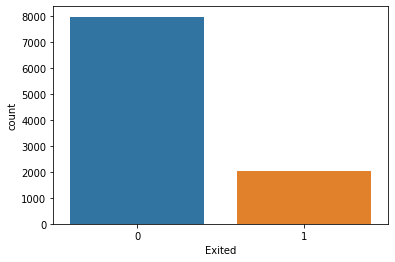

In [11]:
#Lets check the distribution of remaining colums
#Lets start with exited column
sns.countplot(bank_df.Exited)

#We have more records where people have stayed back with the bank than exited

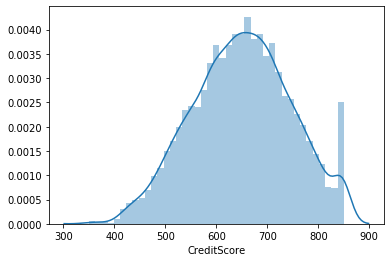

In [12]:
#Lets check how credit score distrbution is now
sns.distplot(bank_df.CreditScore)

#Slightly left skewed normal distribution

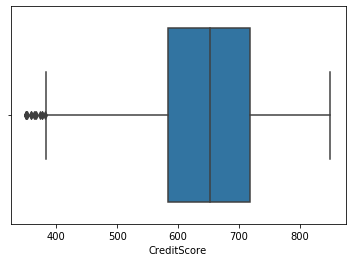

In [13]:
sns.boxplot(bank_df.CreditScore)

#Left skewed with few outliers..

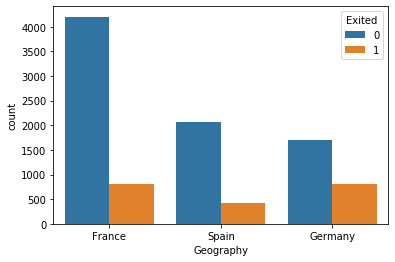

In [14]:
#Geographical distribution
sns.countplot(bank_df.Geography,hue=bank_df.Exited)

#More cases from France..
#% of exited customers in Germany seems more than other countries

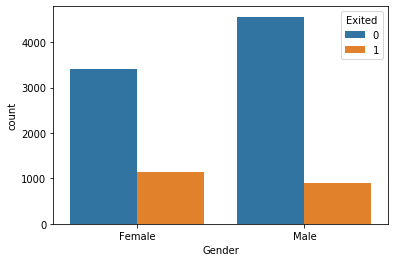

In [15]:
#Gender distribution
sns.countplot(bank_df.Gender,hue=bank_df.Exited)

#Less Female records
#More % of females have exited

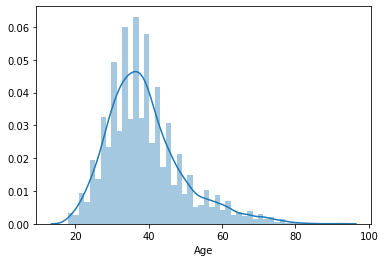

In [16]:
#Age
sns.distplot(bank_df.Age)

#Slightly right skewed but approaching normal distribution

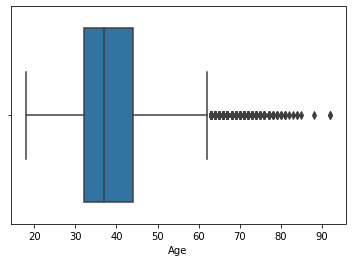

In [17]:
sns.boxplot(bank_df.Age)

#Lot of outliers...many are very old

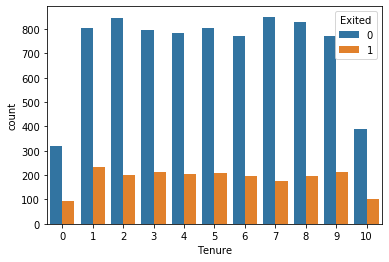

In [18]:
#Tenure
sns.countplot(bank_df.Tenure,hue=bank_df.Exited)

#Seems to be almost uniform..no very obvious trend in terms of % exited customers

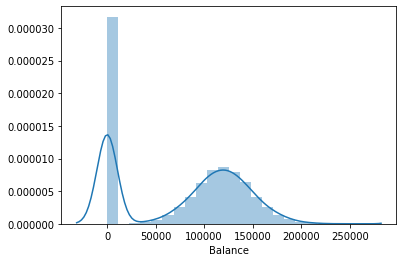

In [20]:
#Balance
sns.distplot(bank_df.Balance)

#Many accounts have zero balance..otherwise it is normal distribution

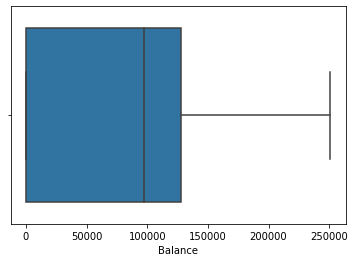

In [21]:
sns.boxplot(bank_df.Balance)

#Lot of accounts with zero balance..is this accurate?

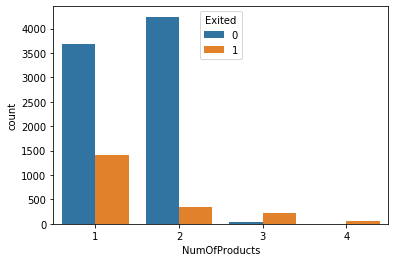

In [22]:
#No of products
sns.countplot(bank_df.NumOfProducts,hue=bank_df.Exited)

#Interesting..people with more products are less but the % of exited customers are more..there is a need to investigate more

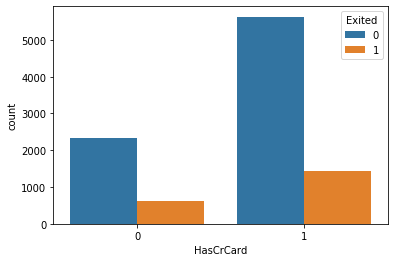

In [23]:
#Credit card
sns.countplot(bank_df.HasCrCard,hue=bank_df.Exited)

#More customers have credit card

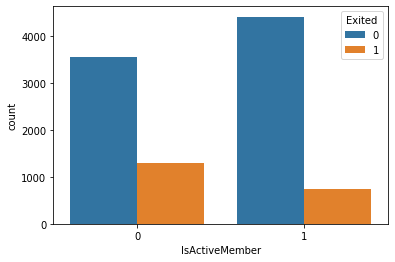

In [24]:
#IsActiveMember
sns.countplot(bank_df.IsActiveMember,hue=bank_df.Exited)

#Lot of inactive customers and as expected more people in this category leave

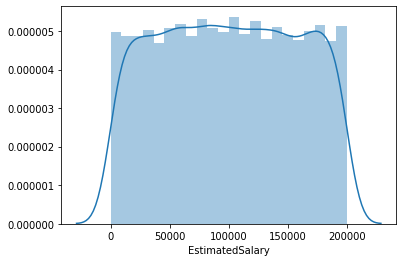

In [25]:
#Estimated Salary
sns.distplot(bank_df.EstimatedSalary)

#As expected flat normal distribution

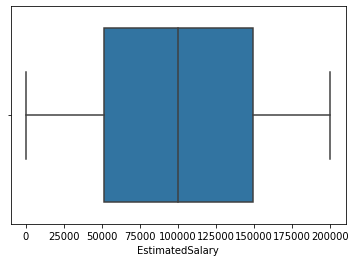

In [26]:
sns.boxplot(bank_df.EstimatedSalary)

In [27]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [28]:
#Lets seperate the features and target
y = bank_df.Exited
X = bank_df.drop("Exited",axis=1)

print("X Shape",X.shape)
print("y Shape",y.shape)

X Shape (10000, 10)
y Shape (10000,)


In [29]:
#Lets split the data into test and training
from sklearn.model_selection import train_test_split

In [30]:
#Lets keep 20% for test, add a random seed for repeatability
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
#check the training and testing dataset shapes
print("Training features :",X_train.shape)
print("Training labels :",y_train.shape)
print("Test features :",X_test.shape)
print("Test labels :",y_test.shape)

Training features : (8000, 10)
Training labels : (8000,)
Test features : (2000, 10)
Test labels : (2000,)


In [32]:
#One hot encoder for encoding features
from sklearn.preprocessing import OneHotEncoder

In [33]:
#Lets now encode the Geography and Gender in feature sets

In [34]:
#For each column, fit and transform on train and then transform on test
cat_cols = ["Geography","Gender"]
for col in cat_cols:
    ohe = OneHotEncoder()
    #print("col name is ",col)
    enc_vals = ohe.fit_transform(X_train[col].values.reshape(-1,1)).todense()
    #print(enc_vals)
    enc_col_names = ohe.get_feature_names([col])
    #print(enc_col_names)
    enc_df = pd.DataFrame(enc_vals,columns=enc_col_names)
    #print(enc_df.info())
    X_train = X_train.reset_index(drop=True).merge(enc_df.reset_index(drop=True), left_index=True, right_index=True)
    X_train = X_train.drop(col,axis=1)
    #print(X_train.info())
    #Test
    enc_vals = ohe.transform(X_test[col].values.reshape(-1,1)).todense()
    enc_df = pd.DataFrame(enc_vals,columns=enc_col_names)
    X_test = X_test.reset_index(drop=True).merge(enc_df.reset_index(drop=True), left_index=True, right_index=True)
    X_test = X_test.drop(col,axis=1)
    #print(X_test.head(1).T)



In [35]:
#Sanity check
print("Training features :",X_train.shape)
print("Test features :",X_test.shape)
print("Sample Training",X_train.head(1).T)
print("Sample Test",X_test.head(1).T)

Training features : (8000, 13)
Test features : (2000, 13)
Sample Training                            0
CreditScore           686.00
Age                    32.00
Tenure                  6.00
Balance                 0.00
NumOfProducts           2.00
HasCrCard               1.00
IsActiveMember          1.00
EstimatedSalary    179093.26
Geography_France        1.00
Geography_Germany       0.00
Geography_Spain         0.00
Gender_Female           0.00
Gender_Male             1.00
Sample Test                           0
CreditScore          596.00
Age                   32.00
Tenure                 3.00
Balance            96709.07
NumOfProducts          2.00
HasCrCard              0.00
IsActiveMember         0.00
EstimatedSalary    41788.37
Geography_France       0.00
Geography_Germany      1.00
Geography_Spain        0.00
Gender_Female          0.00
Gender_Male            1.00


In [36]:
#Convert both test and train features to numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [37]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [38]:
#Import tf for building the NN
import tensorflow as tf

In [39]:
#Sanity
X_train[0]

array([6.8600000e+02, 3.2000000e+01, 6.0000000e+00, 0.0000000e+00,
       2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.7909326e+05,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.0000000e+00])

In [40]:
#Sanity
y_train[0]

0

In [42]:
#Lets normalize the training and test features
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
#Sanity
X_train[0]

array([ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
        0.64920267,  0.97481699,  1.36766974,  1.00150113, -0.57946723,
       -0.57638802, -0.91324755,  0.91324755])

In [45]:
#Lets start the model building activities
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

In [46]:
#Lets build the first model as the baseline model

In [47]:
#Initialize the model
model = Sequential()

In [48]:
#Lets start adding layers
#Add an i/p layer giving out 6 o/p
model.add(Dense(6,activation="relu",input_shape=(13,)))

In [49]:
#Add another layer with activation function relu
model.add(Dense(6,activation="relu"))

In [50]:
#Add an o/p layer to give out one output since this is binary function
#We will use sigmoid activation again because this is binary classification
model.add(Dense(1,activation="sigmoid"))

In [51]:
#Compile the model
#We will use adam optimizer
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [52]:
#Check the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 84        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [53]:
#Lets train the model now
#We will run 20 epochs
#We will keep 15% data as validation as part of training
history = model.fit(X_train, y_train,epochs=20, batch_size=10, verbose=1,validation_split=0.15)

Train on 6800 samples, validate on 1200 samples
Epoch 1/20
6800/6800 [==============================] - 1s 184us/sample - loss: 0.5623 - accuracy: 0.7237 - val_loss: 0.4563 - val_accuracy: 0.7992
Epoch 2/20
6800/6800 [==============================] - 1s 97us/sample - loss: 0.4336 - accuracy: 0.8081 - val_loss: 0.4176 - val_accuracy: 0.8200
Epoch 3/20
6800/6800 [==============================] - 1s 98us/sample - loss: 0.4087 - accuracy: 0.8188 - val_loss: 0.4074 - val_accuracy: 0.8200
Epoch 4/20
6800/6800 [==============================] - 1s 99us/sample - loss: 0.3988 - accuracy: 0.8222 - val_loss: 0.4035 - val_accuracy: 0.8175
Epoch 5/20
6800/6800 [==============================] - 1s 98us/sample - loss: 0.3921 - accuracy: 0.8215 - val_loss: 0.3975 - val_accuracy: 0.8267
Epoch 6/20
6800/6800 [==============================] - 1s 98us/sample - loss: 0.3844 - accuracy: 0.8296 - val_loss: 0.3859 - val_accuracy: 0.8517
Epoch 7/20
6800/6800 [==============================] - 1s 98us/sampl

In [54]:
#Lets evaluate the model

In [55]:
#Get predictions for test
y_predict = model.predict(X_test)

In [56]:
#Sanity check
y_predict[0]

array([0.04421094], dtype=float32)

In [57]:
#Get the accuracy score for this model
model.evaluate(X_test,y_test,verbose=0)

[0.3406147019863129, 0.8575]

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
#We will use threshold as 0.5 for deciding the class
y_pred = (y_predict > 0.5)

In [60]:
#sanity
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [61]:
#Get confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1518   89]
 [ 196  197]]


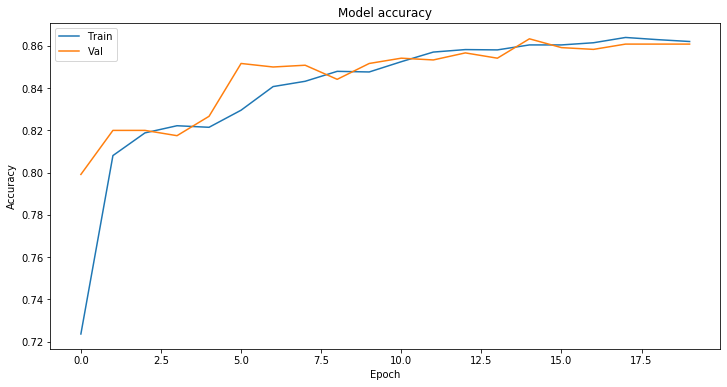

In [62]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train',"Val"], loc='upper left')

In [63]:
#We can see that there is slight overfitting  because test accuracy is less than train/val accuracy

In [64]:
#Lets change some parameters and see if we can increase the accuracy without much overfitting

In [65]:
new_model = Sequential()

In [66]:
new_model.add(Dense(13,activation="relu",input_shape=(13,)))

In [67]:
new_model.add(Dense(6,activation="relu"))

In [68]:
new_model.add(Dropout(rate=0.5))

In [69]:
new_model.add(Dense(1,activation="sigmoid"))

In [70]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [71]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 84        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [72]:
new_history = new_model.fit(X_train,y_train,epochs=100,batch_size=10,validation_split=0.15)

Train on 6800 samples, validate on 1200 samples
Epoch 1/100
6800/6800 [==============================] - 1s 152us/sample - loss: 0.5530 - accuracy: 0.7681 - val_loss: 0.4471 - val_accuracy: 0.7983
Epoch 2/100
6800/6800 [==============================] - 1s 108us/sample - loss: 0.4829 - accuracy: 0.7935 - val_loss: 0.4275 - val_accuracy: 0.7983
Epoch 3/100
6800/6800 [==============================] - 1s 104us/sample - loss: 0.4600 - accuracy: 0.7949 - val_loss: 0.4142 - val_accuracy: 0.8008
Epoch 4/100
6800/6800 [==============================] - 1s 99us/sample - loss: 0.4457 - accuracy: 0.7993 - val_loss: 0.4062 - val_accuracy: 0.8125
Epoch 5/100
6800/6800 [==============================] - 1s 99us/sample - loss: 0.4307 - accuracy: 0.8059 - val_loss: 0.4020 - val_accuracy: 0.8150
Epoch 6/100
6800/6800 [==============================] - 1s 98us/sample - loss: 0.4253 - accuracy: 0.8097 - val_loss: 0.4006 - val_accuracy: 0.8175
Epoch 7/100
6800/6800 [==============================] - 1s 9

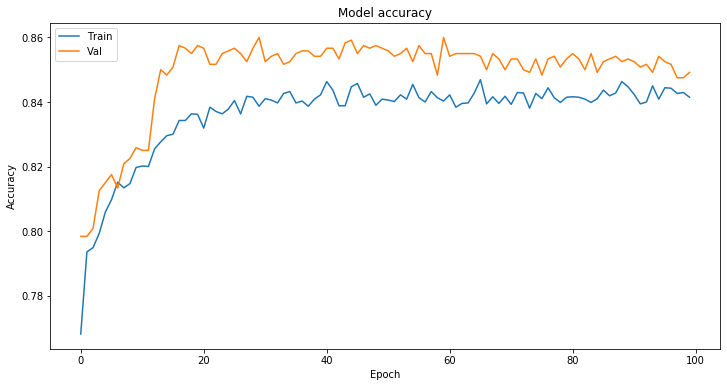

In [73]:
#Lets visualize the training and validation accuracy trends

plt.figure(figsize=(12,6))
plt.plot(new_history.history['accuracy'])
plt.plot(new_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train',"Val"], loc='upper left')

In [74]:
new_model.evaluate(X_test,y_test,verbose=0)

[0.3480784764289856, 0.855]

In [75]:
y_predict = model.predict(X_test)

In [76]:
y_pred = (y_predict > 0.5)

In [77]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1518   89]
 [ 196  197]]


In [78]:
#Test and Training accuracy are appearing to converge with the addition of drop out layer reducing the overfitting
#Addition of dropout layer with 0.5 fraction actually reduced the validation accuracy..we will reduce this in the next
#iteration below from 0.5 to 0.2

In [79]:
#Lets try the same model but fit taking into consideration the class imbalance
from sklearn.utils import class_weight

In [80]:
#Get the class weights
cw = class_weight.compute_class_weight("balanced",np.unique(y_train),y_train)
cw

array([0.62932662, 2.43309002])

In [89]:
#Lets pass this to the third model
model_cw = Sequential()

In [90]:
#Add the layers
model_cw.add(Dense(13,activation="relu",input_shape=(13,)))

model_cw.add(Dense(6,activation="relu"))

#Reduced dropout to 0.2 to reduce overfitting
model_cw.add(Dropout(rate=0.2))

model_cw.add(Dense(1,activation="sigmoid"))

In [91]:
model_cw.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [92]:
model_cw.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 84        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [93]:
history_cw = model_cw.fit(X_train,y_train,epochs=100,batch_size=10,validation_split=0.15,class_weight=cw)

Train on 6800 samples, validate on 1200 samples
Epoch 1/100
6800/6800 [==============================] - 3s 368us/sample - loss: 0.5751 - accuracy: 0.7134 - val_loss: 0.4534 - val_accuracy: 0.8033
Epoch 2/100
6800/6800 [==============================] - 2s 252us/sample - loss: 0.4554 - accuracy: 0.8109 - val_loss: 0.3960 - val_accuracy: 0.8292
Epoch 3/100
6800/6800 [==============================] - 2s 255us/sample - loss: 0.4103 - accuracy: 0.8335 - val_loss: 0.3753 - val_accuracy: 0.8483
Epoch 4/100
6800/6800 [==============================] - 2s 298us/sample - loss: 0.3905 - accuracy: 0.8410 - val_loss: 0.3686 - val_accuracy: 0.8492
Epoch 5/100
6800/6800 [==============================] - 2s 299us/sample - loss: 0.3859 - accuracy: 0.8393 - val_loss: 0.3620 - val_accuracy: 0.8417
Epoch 6/100
6800/6800 [==============================] - 2s 288us/sample - loss: 0.3746 - accuracy: 0.8459 - val_loss: 0.3588 - val_accuracy: 0.8433
Epoch 7/100
6800/6800 [==============================] - 2

6800/6800 [==============================] - 2s 290us/sample - loss: 0.3421 - accuracy: 0.8609 - val_loss: 0.3366 - val_accuracy: 0.8575
Epoch 56/100
6800/6800 [==============================] - 2s 250us/sample - loss: 0.3381 - accuracy: 0.8632 - val_loss: 0.3368 - val_accuracy: 0.8617
Epoch 57/100
6800/6800 [==============================] - 2s 276us/sample - loss: 0.3403 - accuracy: 0.8599 - val_loss: 0.3379 - val_accuracy: 0.8592
Epoch 58/100
6800/6800 [==============================] - 2s 275us/sample - loss: 0.3403 - accuracy: 0.8637 - val_loss: 0.3359 - val_accuracy: 0.8583
Epoch 59/100
6800/6800 [==============================] - 2s 306us/sample - loss: 0.3381 - accuracy: 0.8625 - val_loss: 0.3365 - val_accuracy: 0.8592
Epoch 60/100
6800/6800 [==============================] - 2s 311us/sample - loss: 0.3391 - accuracy: 0.8625 - val_loss: 0.3380 - val_accuracy: 0.8567
Epoch 61/100
6800/6800 [==============================] - 2s 303us/sample - loss: 0.3392 - accuracy: 0.8622 - val

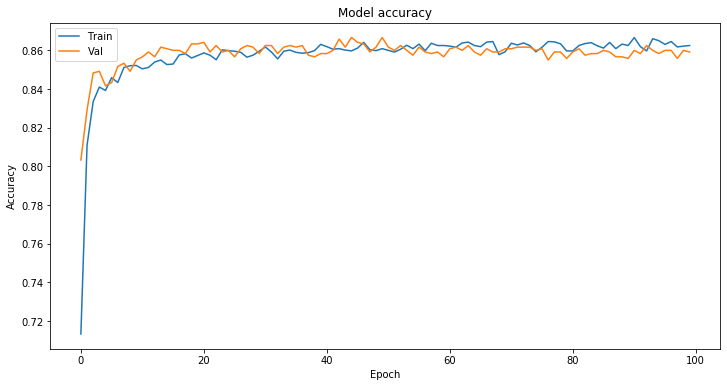

In [94]:
#Lets visualize
plt.figure(figsize=(12,6))
plt.plot(history_cw.history['accuracy'])
plt.plot(history_cw.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train',"Val"], loc='upper left')

In [95]:
model_cw.evaluate(X_test,y_test,verbose=0)

[0.35019321846961976, 0.8485]

In [ ]:
#Manipulating dropout rates and layers help reduce overfitting as well. Not much difference from using class weights